In [1]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

In [2]:
df1 = pd.read_csv('AnimeListDb.csv')
df2 = pd.read_csv('AnimeListDb2.csv')
df3 = pd.read_csv('AnimeListDb3.csv')

In [3]:
combined_df = pd.concat([df1, df2, df3])

In [4]:
combined_df.reset_index(drop=True, inplace=True)
combined_df.to_csv('combined_df.csv')


In [5]:
combined_df.columns

Index(['Unnamed: 0', 'userName', 'anime_Title', 'anime_Score', 'anime_Type'], dtype='object')

In [6]:
titles=list(set(combined_df['anime_Title']))
users=list(set(combined_df['userName']))


In [7]:
movie_ids = {}

# Assign unique IDs to movie titles
for idx, movie_title in enumerate(titles):
    movie_ids[movie_title] = idx+1

user_ids = {}
# Assign unique IDs to users name
for idx, username in enumerate(users):
    user_ids[username] = idx+1


In [8]:

anime_ids_df=pd.DataFrame(list(movie_ids.items()), columns=['anime_Title', 'animeid'])
users_ids_df=pd.DataFrame(list(user_ids.items()), columns=['userName', 'userid'])





In [ ]:
joined

In [9]:
joined_df = pd.merge(combined_df, anime_ids_df, on='anime_Title')
joined_df = pd.merge(joined_df, users_ids_df, on='userName')

In [10]:
df = joined_df[['userid', 'animeid', 'anime_Score']]

In [11]:
df=df.sort_values('userid', ascending=True)


In [12]:
df.head()

,userid,animeid,anime_Score
328015,1,4795,NaN
327849,1,4795,NaN
327850,1,4795,NaN
327851,1,4795,NaN
327852,1,4795,NaN


In [13]:
df.isna().sum()

userid            0
animeid           0
anime_Score    4005
dtype: int64

In [14]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [15]:
df[df['anime_Score'] == '-']


,userid,animeid,anime_Score
325657,2,10770,-
168216,3,1484,-
168240,3,6103,-
168372,3,444,-
168401,3,7909,-
...,...,...,...
50829,1883,7365,-
50827,1883,6949,-
50822,1883,4996,-
50824,1883,173,-


In [16]:
df = df.drop(df[df['anime_Score'] == '-'].index)


In [17]:
df.shape

(287504, 3)

In [18]:
df['anime_Score'] = df['anime_Score'].astype(float)


In [19]:
df.describe()

,userid,animeid,anime_Score
count,287504.000000,287504.000000,287504.000000
mean,923.268629,5548.484852,7.607891
std,551.119513,3232.258277,1.624953
min,2.000000,1.000000,1.000000
25%,434.000000,2748.000000,7.000000
50%,918.000000,5559.000000,8.000000
75%,1401.000000,8289.000000,9.000000
max,1885.000000,11132.000000,10.000000


In [20]:
df.isnull().sum()

userid         0
animeid        0
anime_Score    0
dtype: int64

In [21]:
import seaborn as sns


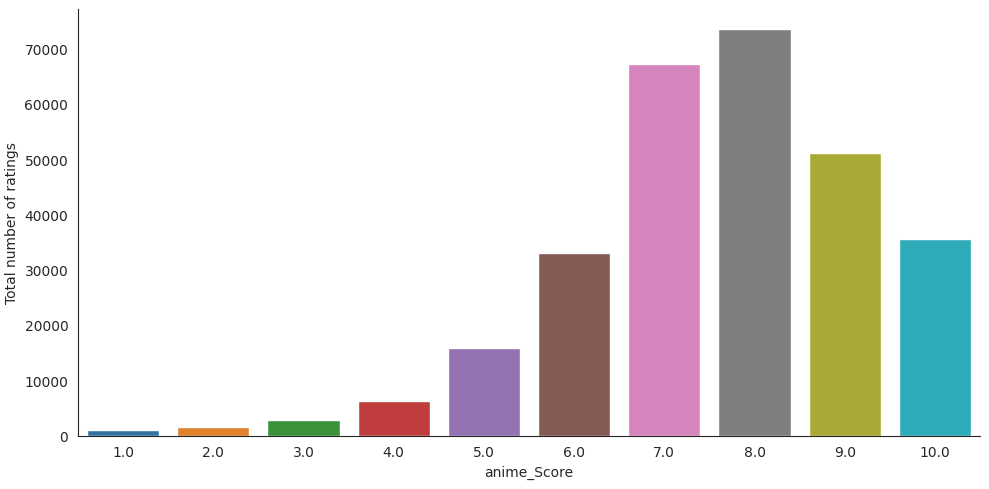

In [22]:
with sns.axes_style('white'):
    g = sns.catplot(x="anime_Score", data=df, aspect=2.0, kind='count')
    g.set_ylabels("Total number of ratings")

In [23]:
gf =pd.DataFrame(df['animeid'].value_counts())
gf

,animeid
794,1027
3558,814
6961,767
3443,766
3052,741
...,...
8286,1
6443,1
10698,1
5936,1


In [24]:
rare_movie = gf[gf['animeid'] <=100].index
# rare_movies
movies_df =df[~df['animeid'].isin(rare_movie)]
movies_df

,userid,animeid,anime_Score
325660,2,6213,9.0
325659,2,10121,8.0
325658,2,6371,8.0
325656,2,7407,9.0
325655,2,7814,10.0
...,...,...,...
298928,1885,11074,7.0
298929,1885,8527,7.0
298930,1885,1384,7.0
298931,1885,7971,6.0


In [25]:
movies_df['animeid'].value_counts()

794      1027
3558      814
6961      767
3443      766
3052      741
         ... 
8845      101
7775      101
1430      101
10819     101
8007      101
Name: animeid, Length: 749, dtype: int64

In [26]:
movieRating_feature= movies_df.pivot_table(index='animeid',columns='userid',values='anime_Score').fillna(0)
movieRating_feature


userid,2,3,4,5,6,7,9,10,11,12,...,1876,1877,1878,1879,1880,1881,1882,1883,1884,1885
animeid,,,,,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,10.0,0.0,0.0,7.0,0.0,0.0,0.0,8.0,0.0
27,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11077,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11091,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0


In [42]:
def recommendedMovie(movieRating_feature):
    mat_movie_features_array = csr_matrix(movieRating_feature.values)
    model_knn = NearestNeighbors(metric='cosine', algorithm='brute',n_jobs=-1)
    model_knn.fit(mat_movie_features_array)
    query_index =np.random.choice(movieRating_feature.shape[0])
    
    distances,indices =model_knn.kneighbors(movieRating_feature.iloc[query_index,:].values.reshape(1,-1), n_neighbors=6)
    
 
    for i in range(0, len(distances.flatten())):
        if i == 0:
            print('Recommendations for : {0}:\n'.format(anime_ids_df['anime_Title'][anime_ids_df['animeid']==movieRating_feature.index[query_index]].iloc[0]))
        else:
            print('{0}'.format(anime_ids_df.loc[anime_ids_df['animeid'] == movieRating_feature.index[indices.flatten()[i]], 'anime_Title'].iloc[0]))

In [43]:
recommendedMovie(movieRating_feature)

Recommendations for : Nura: Le Seigneur des Yokai:

Blue Exorcist
Densetsu no Yuusha no Densetsu
IS: Infinite Stratos
K
Campione!


In [30]:
def recommendedMovie2(movieRating_feature, favoriteMovie):
    mat_movie_features_array = csr_matrix(movieRating_feature.values)
    model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_jobs=-1)
    model_knn.fit(mat_movie_features_array)
    
    query_id = anime_ids_df.loc[anime_ids_df['anime_Title'] == favoriteMovie, 'animeid'].iloc[0]
    query_index = movieRating_feature.index.get_loc(query_id)
    
    distances, indices = model_knn.kneighbors(movieRating_feature.iloc[query_index, :].values.reshape(1, -1), n_neighbors=6)
    
    for i in range(0, len(distances.flatten())):
        if i == 0:
            print('Recommendations for {0}:\n'.format(favoriteMovie))
        else:
            print('{0}'.format(anime_ids_df.loc[anime_ids_df['animeid'] == movieRating_feature.index[indices.flatten()[i]], 'anime_Title'].iloc[0]))


In [31]:
recommendedMovie2(movieRating_feature, "L'Attaque des Titans")

Recommendations for L'Attaque des Titans:

L'Attaque des Titans Saison 2
One Punch Man
My Hero Academia
Fullmetal Alchemist Brotherhood
Sword Art Online


In [32]:
df1.head()

,Unnamed: 0,userName,anime_Title,anime_Score,anime_Type
0,0,karthiga,Accel World,5,TV
1,1,karthiga,Air Gear,10,TV
2,2,karthiga,Alice Academy,7,TV
3,3,karthiga,Bakuman 2,8,TV
4,4,karthiga,Bakuman.,7,TV


In [29]:
""""
def recommendedMovie2(movieRating_feature,favoriteMovie):
    mat_movie_features_array = csr_matrix(movieRating_feature.values)
    model_knn = NearestNeighbors(metric='cosine', algorithm='brute',n_jobs=-1)
    model_knn.fit(mat_movie_features_array)
    query_index = movieRating_feature.index.get_iloc(anime_ids_df['animeid'][anime_ids_df['anime_Title']==favoriteMovie])
    print(query_index)
    distances,indices =model_knn.kneighbors(movieRating_feature.iloc[query_index,:].values.reshape(1,-1), n_neighbors=6)
    for i in range(0, len(distances.flatten())):
        if i == 0:
            print('Recommendations for {0}:\n'.format(anime_ids_df['anime_Title'][anime_ids_df['animeid']==movieRating_feature.index[query_index]]))
        else:
            print('{0}'.format( anime_ids_df['anime_Title'][anime_ids_df['animeid']==movieRating_feature.index[indices.flatten()[i]]]))
            """